In [1]:
import tellurium as te
import seaborn as sns
import pandas as pd
import matplotlib
matplotlib.rcParams['text.usetex'] = False
import matplotlib.pyplot as plt
import model_data
#import fit_data
import numpy as np
%matplotlib inline 



In [2]:
#print(plt.style.available)
plt.style.library['seaborn']['grid.color'] = u'#DFDFDF'
plt.style.library['seaborn']['grid.linewidth'] = 1.0

plt.style.library['seaborn']['figure.figsize'] =  [8.5,5.0]

plt.style.library['seaborn']['axes.facecolor'] = u'white'#4C72B0'
plt.style.library['seaborn']['axes.linewidth'] = 1.0#4C72B0'
plt.style.library['seaborn']['axes.edgecolor'] = u'black'

plt.style.library['seaborn']['xtick.major.size'] = 3
plt.style.library['seaborn']['xtick.top']=True
plt.style.library['seaborn']['ytick.major.size'] = 3
plt.style.library['seaborn']['ytick.right']=True

plt.style.use(u'seaborn')
plt.style.use(u'seaborn-colorblind')
plt.style.library['seaborn']



RcParams({'axes.axisbelow': True,
          'axes.edgecolor': 'black',
          'axes.facecolor': 'white',
          'axes.grid': True,
          'axes.labelcolor': '.15',
          'axes.labelsize': 11.0,
          'axes.linewidth': 1.0,
          'axes.prop_cycle': cycler('color', ['#4C72B0', '#55A868', '#C44E52', '#8172B2', '#CCB974', '#64B5CD']),
          'axes.titlesize': 12.0,
          'figure.facecolor': 'white',
          'figure.figsize': [8.5, 5.0],
          'font.family': ['sans-serif'],
          'font.sans-serif': ['Arial',
                              'Liberation Sans',
                              'DejaVu Sans',
                              'Bitstream Vera Sans',
                              'sans-serif'],
          'grid.color': '#DFDFDF',
          'grid.linestyle': '-',
          'grid.linewidth': 1.0,
          'image.cmap': 'Greys',
          'legend.fontsize': 10.0,
          'legend.frameon': False,
          'legend.numpoints': 1,
          'legend.scatte

In [3]:
def get_paras_dic(modeltxt):
    dic={}
    model_file=open(modeltxt,'rb')
    print(model_file)
    for line in model_file:
        linespl = line.split()
        
        if (len(linespl)>=5):
            if (linespl[1] == '=') & ~(str(linespl[0]).startswith('//')) & ~(str(linespl[0]).endswith("'")):
                dic[linespl[0]] = linespl[2][0:-1] + ' ' +  linespl[4]  
    return dic

In [4]:
#seconds [0] or minutes [1]
def time_in_s_or_min(time_array, scale='min'):
    
    xmax=max(time_array)
    
    if scale == 'min':
        time = time_array/60
        xlim=(-10,xmax/60)
    elif scale == 's': 
        time = time_array
        xlim=(-200, xmax)
    else: 
        print('choose time scale')
        time=0
        xlim=(-1,1)
    
    return time, xlim

In [15]:
def plot_details(sim,
                 time,
                 var,
                 ax,
                 title='',
                 max_y=0,
                 scale='min',
                 xlim=(-1,+1),
                 ylabel='',
                 label='',
                 scale_values=1,
                 color=[]):
    
    
    
    max_y_simu = max(sim[var])*1.1

    if max_y < max_y_simu:
          max_y = max_y_simu
    
    if label=='':
         label= var        
    if list(color):
        ax.plot(time, sim[var]*scale_values, label = label, color=color)
    else:
        ax.plot(time, sim[var]*scale_values, label = label)    
    #if var.startswith('V'):
       # ylabel='volume, fL'

    ax.set_ylabel(ylabel)
    #ax.plot(time, sim[var]*scale_values, label = label)
    ax.set_title(title)
    ax.set_xlim(xlim[0], xlim[1])#end_time)
    ax.set_ylim(0, max_y*scale_values)
    ax.set_xlabel('time, ' + scale)
    ax.legend(frameon=False)
    
    return max_y
    

In [22]:
def plot_sens(model, ax, para_2change_dic,# para_name, values,
              end_time=3600,
              steps=1000,
              scale='min',
              selections=['time','V_total_fl'],
              additional_model_paras={},
              legend=True,
              colormap=sns.color_palette('colorblind')):

    max_y=0
    cmap=para_2change_dic[para_name][4]

    for k,value in enumerate(para_2change_dic[para_name][1]):
        
        changed_para={}
        changed_para[para_2change_dic[para_name][0]]=value
        model.resetToOrigin()
        model.integrator.relative_tolerance= 1e-10
        model = model_data.set_model_parameters(model, additional_model_paras)
        model = model_data.set_model_parameters(model,changed_para)
              
        sim = model.simulate(1, end_time, steps, selections=observables)
        time, xlim  = time_in_s_or_min(sim['time'], scale='min')
        
        max_y = plot_details(sim, time, var, ax, scale='min', xlim=xlim, max_y=max_y, color=cmap[k])
    if legend:
        ax.legend(values,
                  frameon=False,
                  title=r'$'+para_name.split('_')[0] +'_{'+ para_name.split('_')[1] +'}'+ '$, $s^{-1} um^{-2}$',
                  loc=(1.1,0))
    

In [7]:
def print_model_parameters(modeltxt, ax, fontsize=9):
    paras_dic = {}
    paras_dic = get_paras_dic(modeltxt)

    for pos,key in enumerate(paras_dic):
        ax.text(0.8,
                1./len(paras_dic)*(pos+1),
                key  + ' : ' + paras_dic[key],
                fontsize=fontsize,
                transform=ax.transAxes)

    plt.tight_layout()
    

In [8]:
def add_plot_label(k, ax, pos=(0.05, 0.9), caps=True):
    if caps:
        plotlabel=['A','B','C','D','E','F','G','H','I']
    else:
        plotlabel=['(a)','(b)','(c)','(d)','(e)','(f)','(g)','(h)','(i)']
    ax.text(pos[0],pos[1], plotlabel[k], fontsize=12, transform=ax.transAxes)

In [79]:
model_species={'time':r't' ,
               'V_tot_fl':r'$V$',
               '[c_e]': r'$c_e$',
               '[c_i]': r'$c_i$',
               'pi_i' : r'$\Pi_i$',
               'pi_e' : r'$\Pi_e$',
               'R_ref': r'$R_{ref}$',
               'r'    : r'$r$',
               'r_os' : r'$r_{os}$',
               'r_b'  : r'$r_{b}$',
               'pi_t' : r'$\Pi_t$',
               'V_ref': r'$V_{ref}$'}
end_time = 22000
steps = 1000

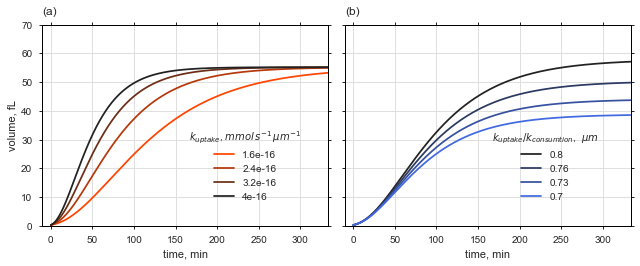

In [54]:
modeltxt='volume_reference_radius.txt'
model=te.loadAntimonyModel(modeltxt)

#model_species=['time','V_tot_fl', '[c_e]', '[c_i]','pi_i','pi_e', 'R_ref', 'r','r_os', 'r_b', 'pi_t', 'V_ref']
#end_time = 22000
#steps = 1000
num=4


#sensitivity 
para_2change_dic={r'$k_{uptake}$':['k_nutrient',
                                   np.linspace(1.6,4.0, num=num)*1e-16,
                                   np.linspace(1.6,4.0, num=num)*1e-16,
                                   r'$mmol \, s^{-1} \, \mu m^{-1}$',
                                  sns.dark_palette('orangered',num, reverse=True)],
                  
                  r'$k_{uptake}/k_{consumtion}$':['k_scaling_factor',
                                                  np.linspace(10./8.,10./7., num=num),
                                                  (1/np.linspace(10./8.,10./7., num=num)).round(decimals=2),
                                                 r' $\mu m$',
                                                 sns.dark_palette('royalblue',num)]}



#model
observables = ['time','V_tot_fl','r']#model_species
number_of_observables = len(observables)-1
number_of_paras = len(para_2change_dic.keys())
var=observables[1]

#specification
additional_model_paras={'withSF':1,
                        't_permeability': end_time+100}

# Plot
subplots=len(para_2change_dic)
fig1, ax=plt.subplots(1, subplots, sharey=True)
fig1.set_size_inches(9,3.6)
#para_name = para_2change_dic.keys()[0]



#colors
#bp=sns.dark_palette('royalblue',num)
#op=sns.dark_palette('orangered',num)
#list(sns.cm.colors.cnames.keys())
#colors=[bp,op]

for k, para_name in enumerate(para_2change_dic.keys()):
        
    if subplots == 1:
        ax_k=ax
        
    else:
        ax_k=ax[k]
        
    #ax_k[-1] .axis('off') 
    values=para_2change_dic[para_name][1]
    para_name_model=para_2change_dic[para_name][0]
    
    plot_sens(model,
              ax_k,
              para_2change_dic,
              end_time=end_time,
              steps=steps,
              scale='min',
              additional_model_paras=additional_model_paras)
    
                      
    ax_k.legend(para_2change_dic[para_name][2],
                title=para_name+', '+para_2change_dic[para_name][3],
                loc=(0.5,0.1),
                frameon=False,
                ncol=1)
    plt.ylim(0,70)
    add_plot_label(k, ax_k, pos=(0.0, 1.05),  caps=False)      
   
#print_model_parameters(modeltxt, ax_k, fontsize=9)
ax[0].set_ylabel('volume, fL')   
#plt.savefig('plots/diss_parameter_sensitivity.png',dpi=600)
plt.savefig('/Users/bjorngoldenbogen/Google Drive/Diss/Dissertation_latex/figures/diss_parameter_sensitivity.png',dpi=600, bbox_inches="tight")

plt.tight_layout()

In [ ]:
c_names=['aliceblue', 'antiquewhite', 'aqua', 'aquamarine', 'azure', 'beige', 'bisque', 'black', 'blanchedalmond', 'blue', 'blueviolet', 'brown', 'burlywood', 'cadetblue', 'chartreuse', 'chocolate', 'coral', 'cornflowerblue', 'cornsilk', 'crimson', 'cyan', 'darkblue', 'darkcyan', 'darkgoldenrod', 'darkgray', 'darkgreen', 'darkgrey', 'darkkhaki', 'darkmagenta', 'darkolivegreen', 'darkorange', 'darkorchid', 'darkred', 'darksalmon', 'darkseagreen', 'darkslateblue', 'darkslategray', 'darkslategrey', 'darkturquoise', 'darkviolet', 'deeppink', 'deepskyblue', 'dimgray', 'dimgrey', 'dodgerblue', 'firebrick', 'floralwhite', 'forestgreen', 'fuchsia', 'gainsboro', 'ghostwhite', 'gold', 'goldenrod', 'gray', 'green', 'greenyellow', 'grey', 'honeydew', 'hotpink', 'indianred', 'indigo', 'ivory', 'khaki', 'lavender', 'lavenderblush', 'lawngreen', 'lemonchiffon', 'lightblue', 'lightcoral', 'lightcyan', 'lightgoldenrodyellow', 'lightgray', 'lightgreen', 'lightgrey', 'lightpink', 'lightsalmon', 'lightseagreen', 'lightskyblue', 'lightslategray', 'lightslategrey', 'lightsteelblue', 'lightyellow', 'lime', 'limegreen', 'linen', 'magenta', 'maroon', 'mediumaquamarine', 'mediumblue', 'mediumorchid', 'mediumpurple', 'mediumseagreen', 'mediumslateblue', 'mediumspringgreen', 'mediumturquoise', 'mediumvioletred', 'midnightblue', 'mintcream', 'mistyrose', 'moccasin', 'navajowhite', 'navy', 'oldlace', 'olive', 'olivedrab', 'orange', 'orangered', 'orchid', 'palegoldenrod', 'palegreen', 'paleturquoise', 'palevioletred', 'papayawhip', 'peachpuff', 'peru', 'pink', 'plum', 'powderblue', 'purple', 'rebeccapurple', 'red', 'rosybrown', 'royalblue', 'saddlebrown', 'salmon', 'sandybrown', 'seagreen', 'seashell', 'sienna', 'silver', 'skyblue', 'slateblue', 'slategray', 'slategrey', 'snow', 'springgreen', 'steelblue', 'tan', 'teal', 'thistle', 'tomato', 'turquoise', 'violet', 'wheat', 'white', 'whitesmoke', 'yellow', 'yellowgreen']

In [14]:
if list(colors[0][0]):
    pass

In [ ]:
a=1
#b=0
num=10
l=len(c_names)

x=np.linspace(0,10,100)
para1=np.linspace(0,3,num)

plt.figure(1, figsize=(10,90))


for i,name in enumerate(c_names):
    
    plt.subplot((l/3)+1, 3, i+1)
    plt.title(name)
    
    colors=sns.dark_palette(c_names[i],num)
        
    
    for k,b in enumerate(para1):
        y=np.sin(a*x+b)
        plt.plot(x,y,color=colors[k])

plt.tight_layout()        
plt.savefig('/home/bjoern/Desktop/test.png')

<_io.BufferedReader name='volume_reference_radius.txt'>


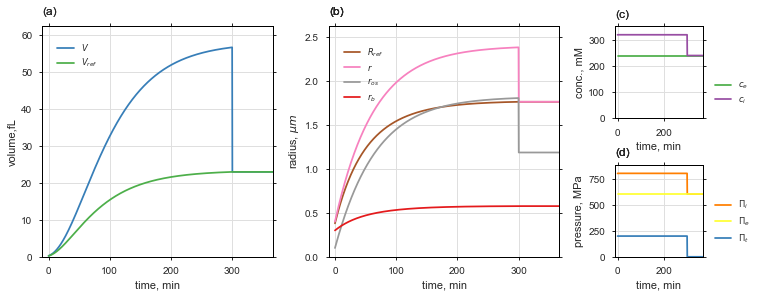

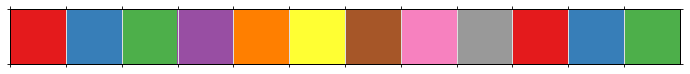

In [80]:
#Plot Grid
import matplotlib.gridspec as gridspec
gs=gridspec.GridSpec(2, 5)
ax=[]
ax.append(plt.subplot(gs[:,0:2]))
ax.append(plt.subplot(gs[:,2:4]))
ax.append(plt.subplot(gs[0,4]))
ax.append(plt.subplot(gs[1,4]))
####

#model
modeltxt='volume_reference_radius.txt'
model=te.loadAntimonyModel(modeltxt)
#model_species=['time','V_tot_fl', '[c_e]', '[c_i]','pi_i','pi_e', 'R_ref', 'r','r_os', 'r_b', 'pi_t', 'V_ref']
#model_species_names=[r't',r'$V_{tot}', r'$c_e$', r'$c_i$',r'$\Pi_i$',r'$\Pi_e$', r'$R_{ref}$', r'$r$',r'$r_{os}$', r'$r_b$', r'$\Pi_t$', r'$V_{ref}$']

model_species={'time':r't' ,
               'V_tot_fl':r'$V$',
               '[c_e]': r'$c_e$',
               '[c_i]': r'$c_i$',
               'pi_i' : r'$\Pi_i$',
               'pi_e' : r'$\Pi_e$',
               'R_ref': r'$R_{ref}$',
               'r'    : r'$r$',
               'r_os' : r'$r_{os}$',
               'r_b'  : r'$r_{b}$',
               'pi_t' : r'$\Pi_t$',
               'V_ref': r'$V_{ref}$'}


#end_time = 20000
#steps = 1000

#model specifications
model['t_permeability']=18000 

sim=model.simulate(1, end_time, steps, selections = list(model_species.keys()))

variables = sim.colnames
number_of_variables = len(variables)
paras_dic = {}
paras_dic = get_paras_dic(modeltxt)
time, xlim  = time_in_s_or_min(sim['time'], scale='min')

# Plot
#fig1, ax = plt.subplots(2,2)#, sharex=True)
fig1=plt.figure(1)
fig1.set_size_inches(10,4)

maxy = [0]*4
maxy_s = maxy

#caption position
pos_s=(0.0,1.1) #small subplot
pos_l=(0.0,1.05)#large subplot

#legend position
pos_o=(1.1, 0.1) # outside
pos_i=(0.05, 0.65) # inside

#cmap=sns.cubehelix_palette(number_of_variables, start=3, rot=1, dark=0.3, light=.95, reverse=True)
#cmap=sns.color_palette(['#a6cee3','#1f78b4','#b2df8a','#33a02c','#fb9a99','#e31a1c','#fdbf6f','#ff7f00','#cab2d6','#6a3d9a','#ffff99','#b15928'])
cmap=sns.color_palette('Set1', number_of_variables)

#cmap=sns.color_palette()
for k,var in enumerate(variables):
    
    #subplotlabel position
    pos=pos_s
    legend_loc=pos_o 
    scale_values=1
   
    if var == 'time':
        continue
    if var.startswith('V'):
        plotnumb=0
        ylabel='volume,fL'
        pos=pos_l
        legend_loc=(0.05, 0.8)
               
    elif var.startswith('[c'):
        plotnumb=2
        ylabel='conc., mM'
            
#     elif var.startswith('r_'):
#         plot_details(sim, time, var,   max_y=3, ax=ax[1][0], scale='min', xlim=xlim, ylabel=r'radius, ${\mu} m$')
#         add_plot_label(2, ax=ax[1][0],pos=pos)
    elif var in ['r', 'R_ref', 'r_os', 'r_b']:
        plotnumb=1
        ylabel=r'radius, ${\mu} m$'
        pos=pos_l
        legend_loc=pos_i

    elif var.startswith('p'):
        plotnumb=3
        scale_values=0.001
        ylabel=r'pressure, MPa'
        pos=pos_s
        legend_loc=pos_o
    else:
        pass
    
    maxy_s=max(sim[var])*1.1
    #print(' maxy_S :{0} , maxy:{1} , variabl:{2}'.format(maxy_s,maxy[plotnumb],var)) # control for max values
    
    if (maxy[plotnumb] < maxy_s):
            maxy[plotnumb] = maxy_s

    plot_details(sim, time, var, ax[plotnumb],
                 title=' ',
                 max_y=maxy[plotnumb],
                 scale='min',
                 xlim=xlim,
                 ylabel=ylabel,
                 label=model_species[var],
                 scale_values=scale_values,
                 color=cmap[k])
    
    add_plot_label(plotnumb, ax[plotnumb],pos=pos, caps=False,)
    ax[plotnumb].legend(loc=legend_loc, fontsize='small', frameon=False)


#ax[-1][-1].axis('off')

#for pos,key in enumerate(paras_dic):
 #   ax[-1][-1].text(0.1, 1./len(paras_dic)*(pos+1)-1.5, key  + ' : ' + paras_dic[key], fontsize=9, transform=ax[-1][-1].transAxes)
plt.tight_layout()

#plt.savefig('plots/diss_simulation__refradius_osmo.png',dpi=600, bbox_inches="tight")
plt.savefig('/Users/bjorngoldenbogen/Google Drive/Diss/Dissertation_latex/figures/diss_simulation__refradius_osmo.png',dpi=600, bbox_inches="tight")

plt.figure(2)
sns.palplot(cmap)


/Applications/anaconda/lib/python3.6/site-packages/matplotlib/pyplot.py:524: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).



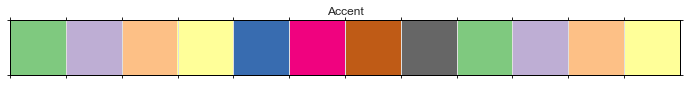

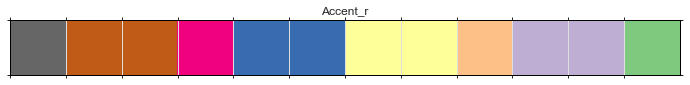

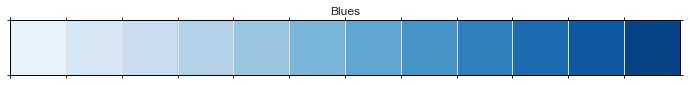

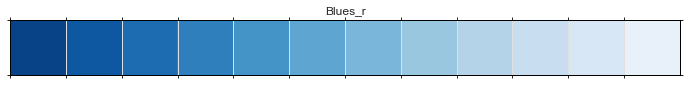

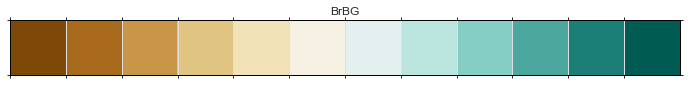

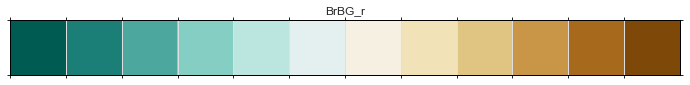

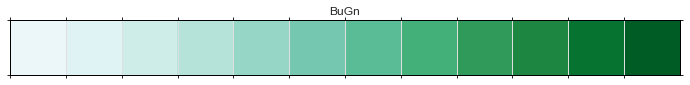

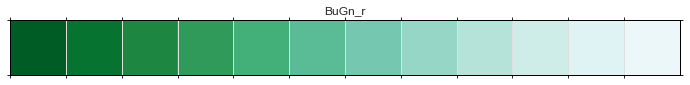

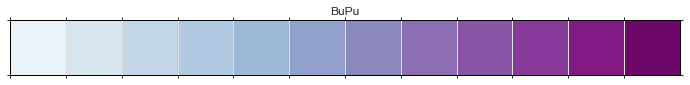

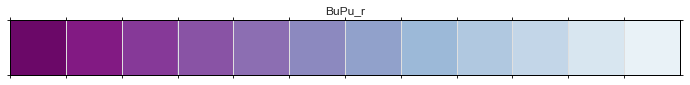

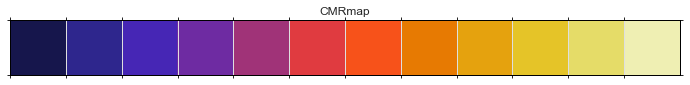

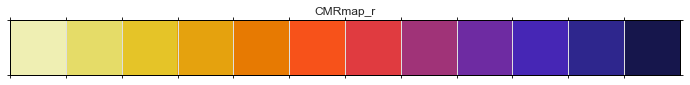

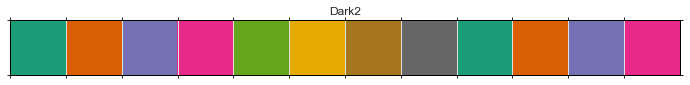

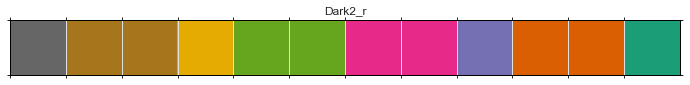

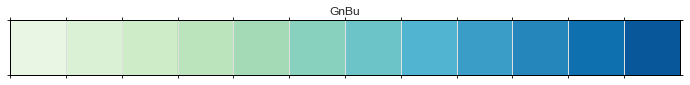

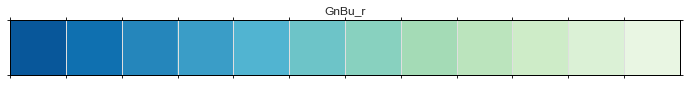

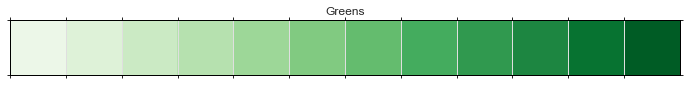

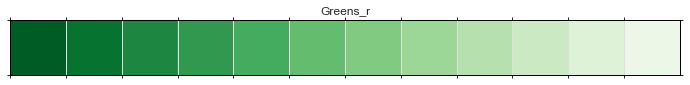

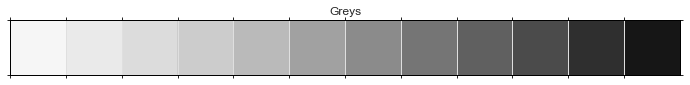

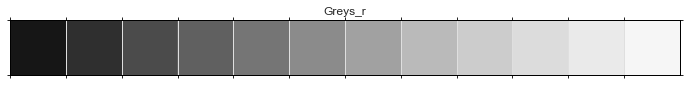

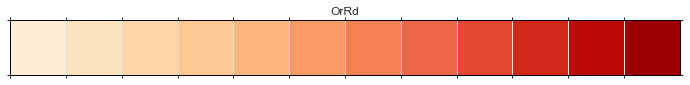

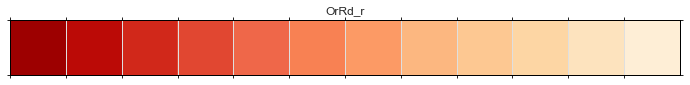

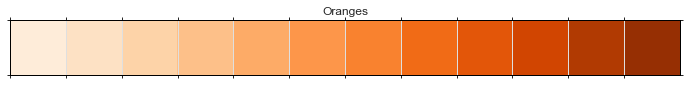

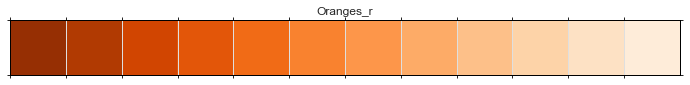

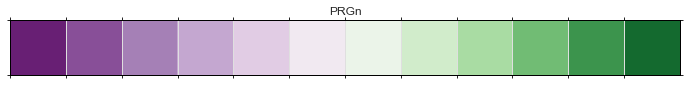

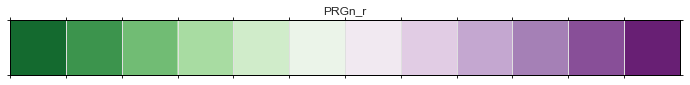

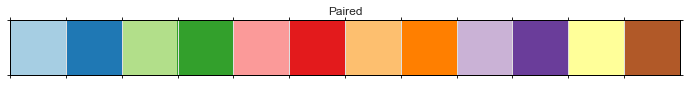

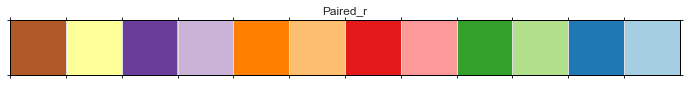

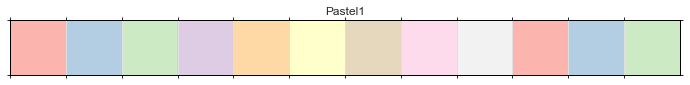

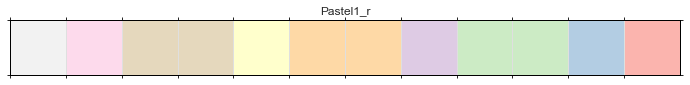

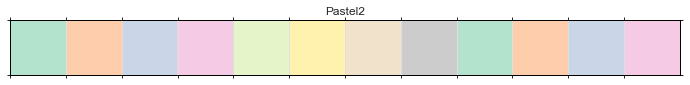

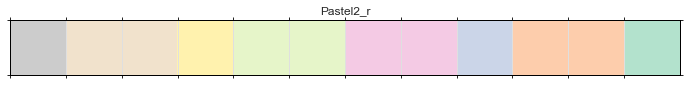

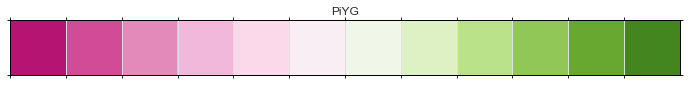

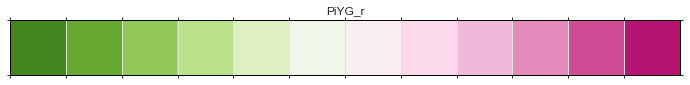

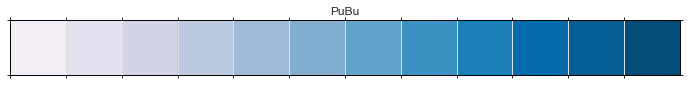

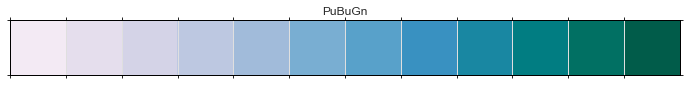

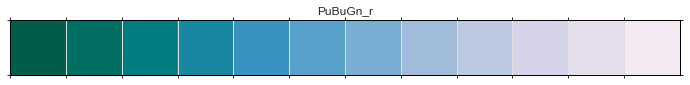

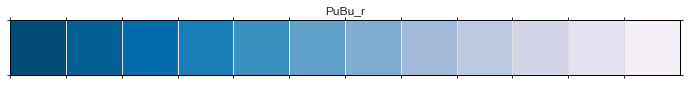

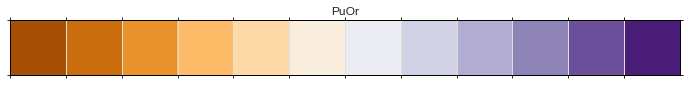

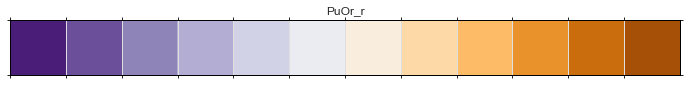

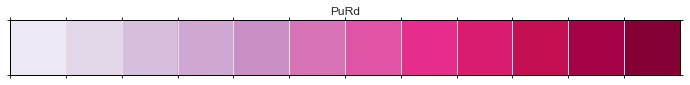

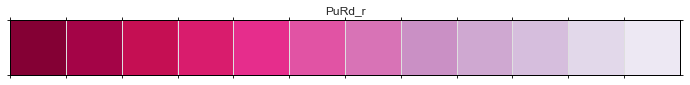

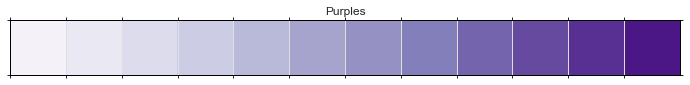

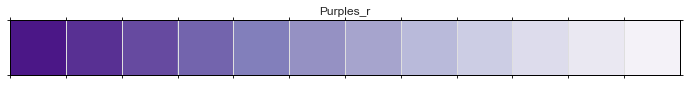

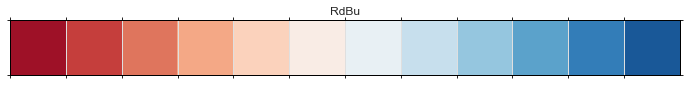

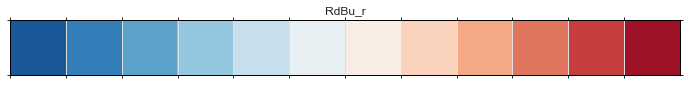

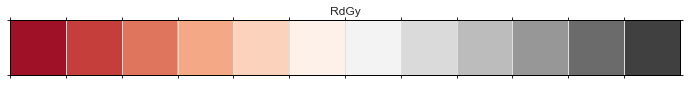

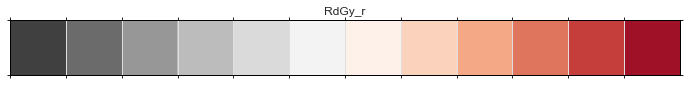

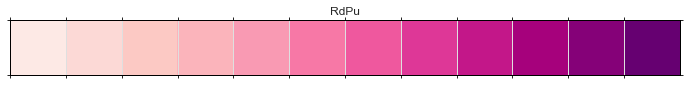

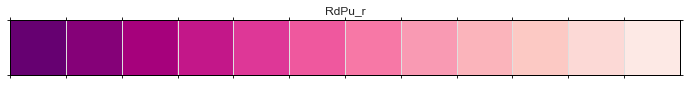

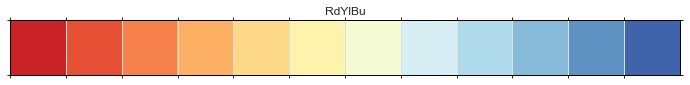

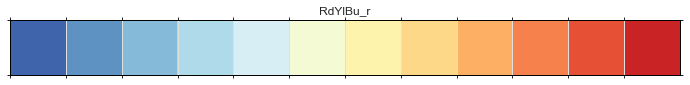

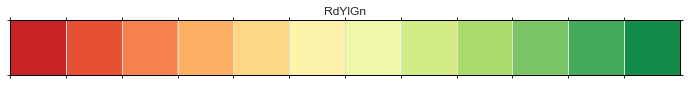

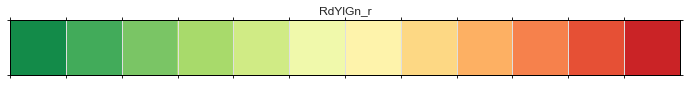

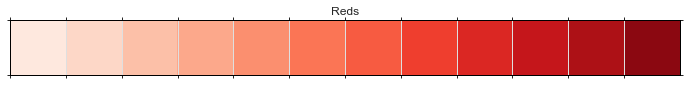

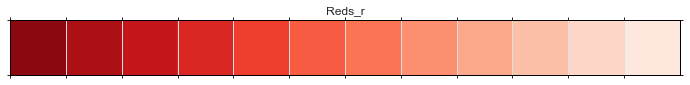

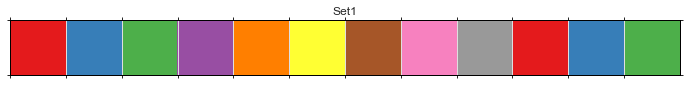

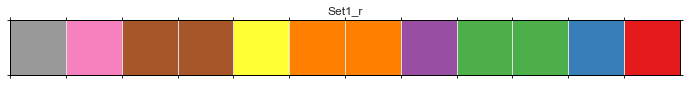

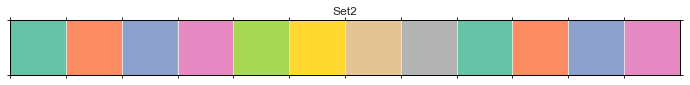

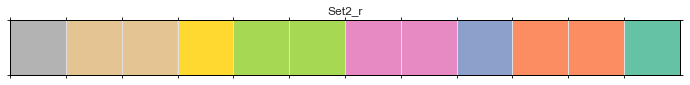

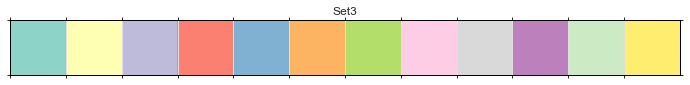

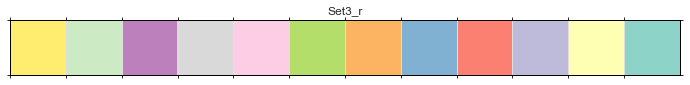

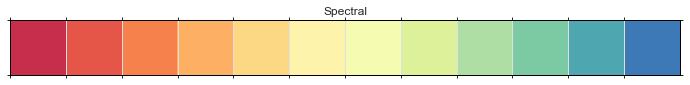

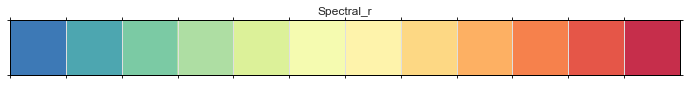

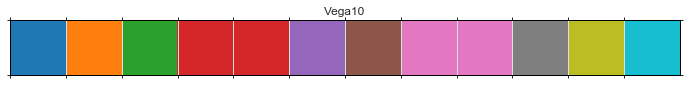

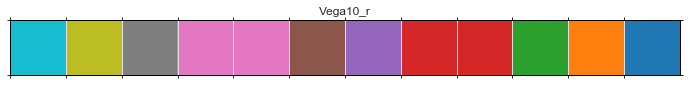

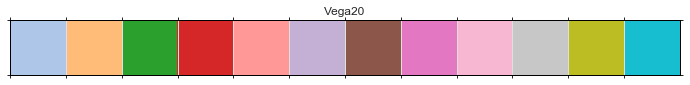

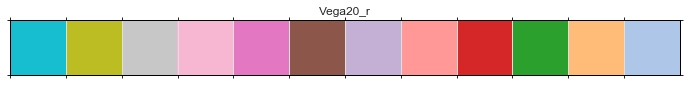

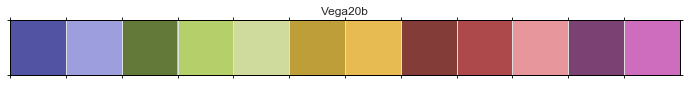

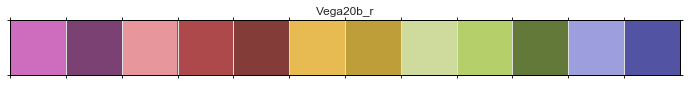

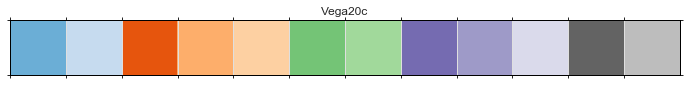

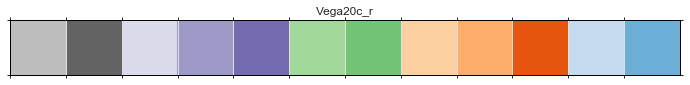

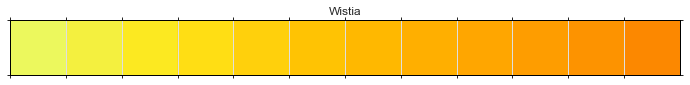

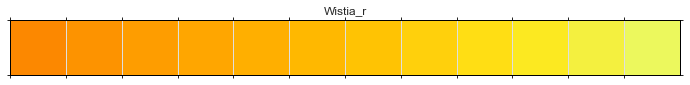

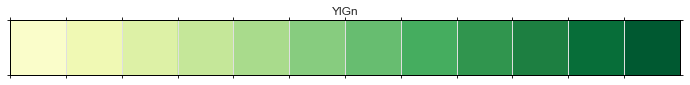

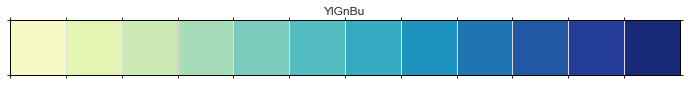

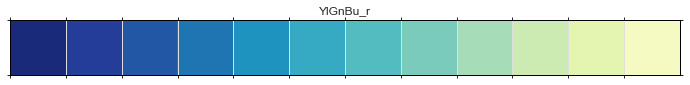

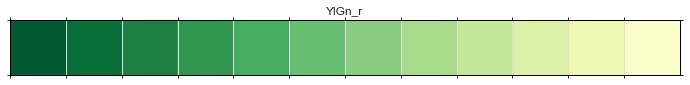

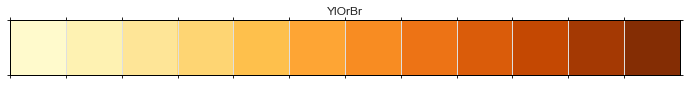

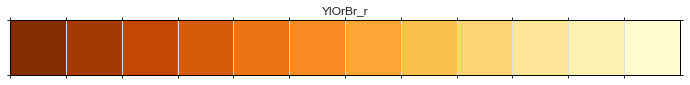

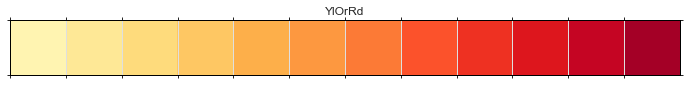

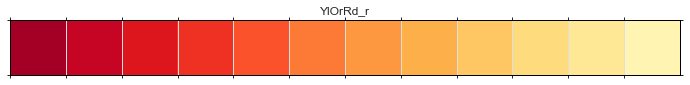

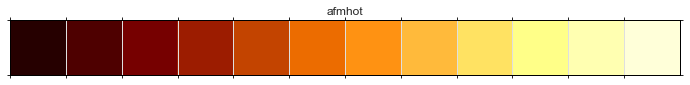

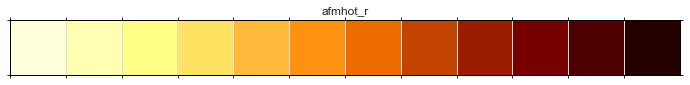

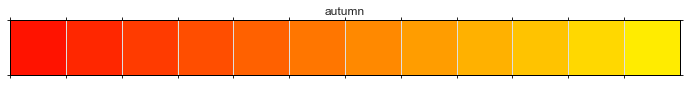

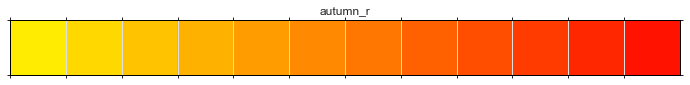

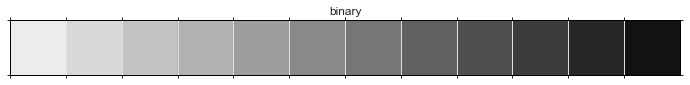

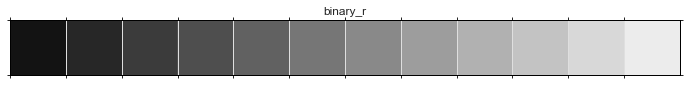

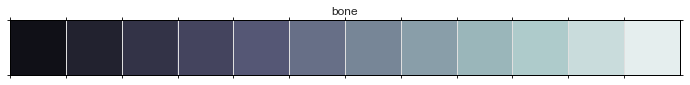

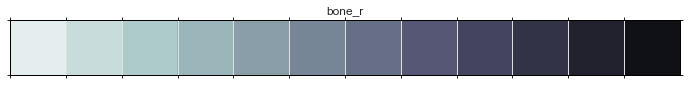

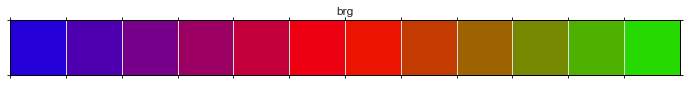

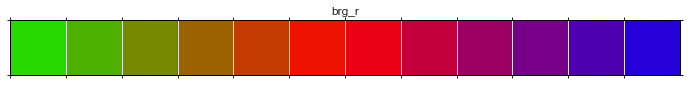

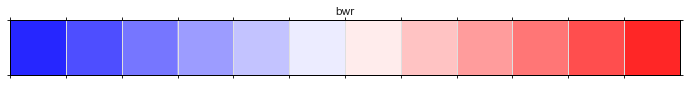

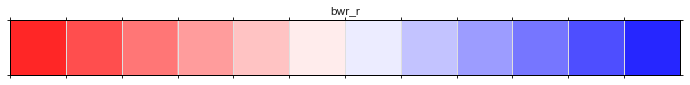

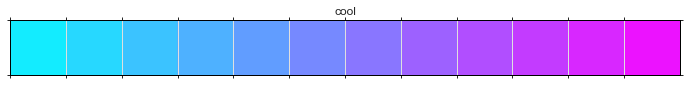

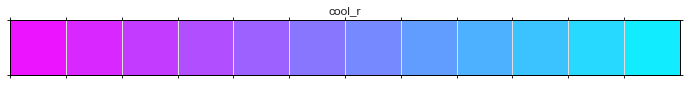

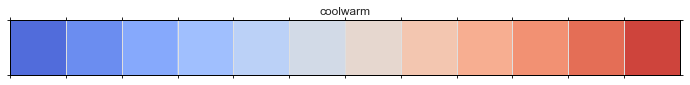

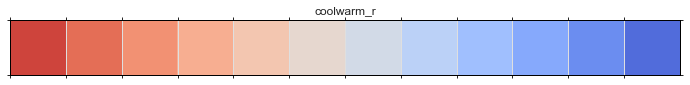

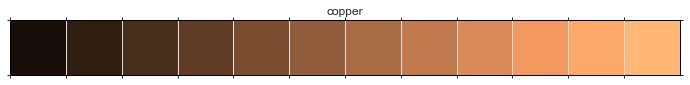

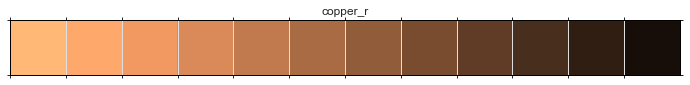

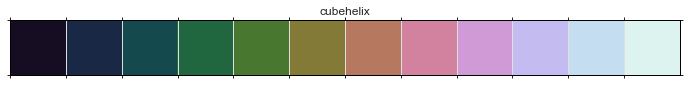

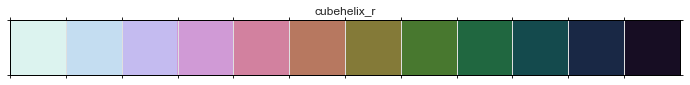

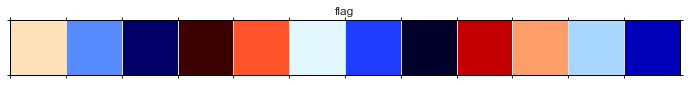

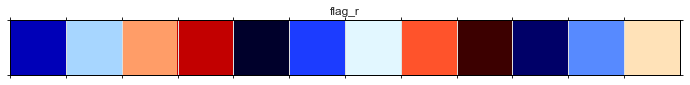

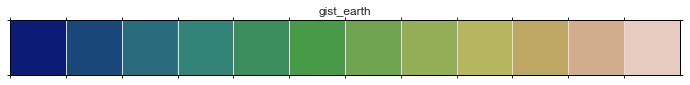

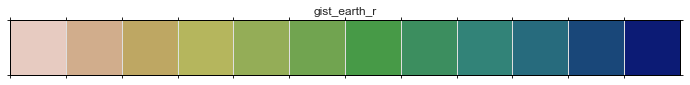

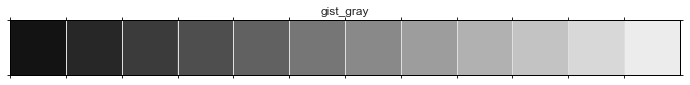

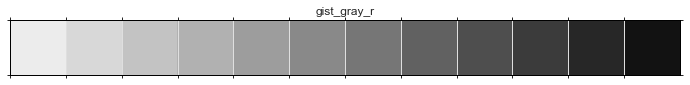

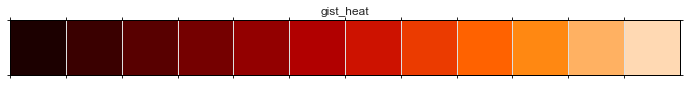

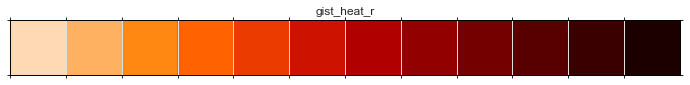

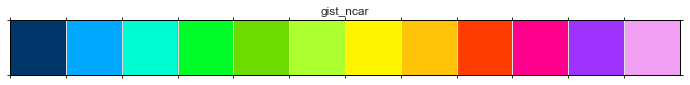

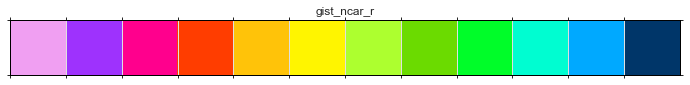

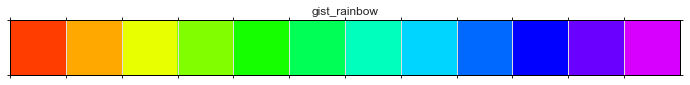

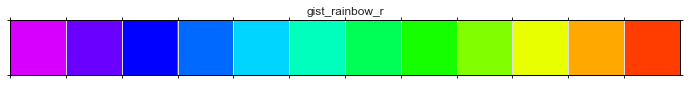

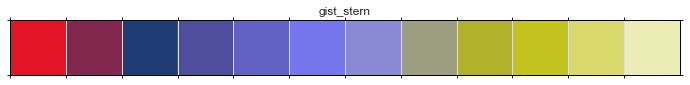

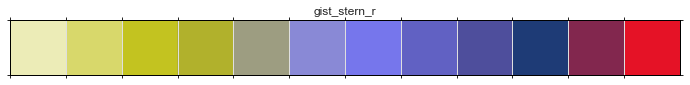

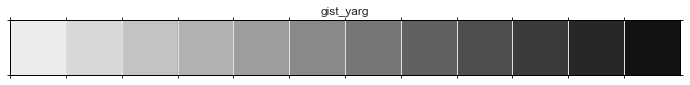

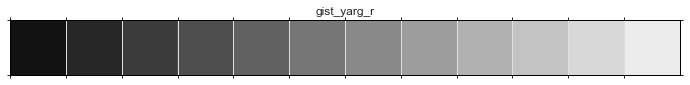

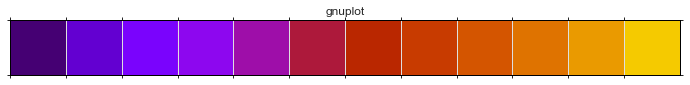

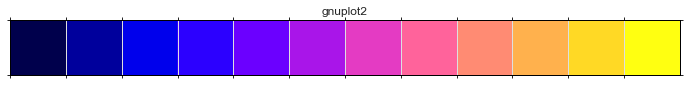

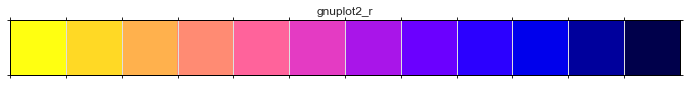

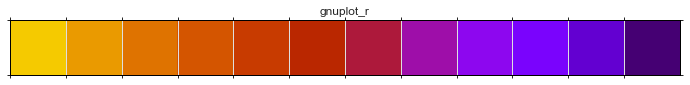

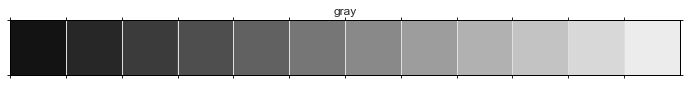

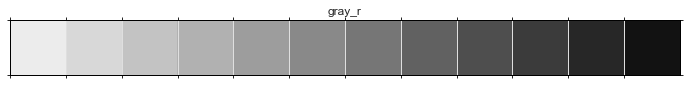

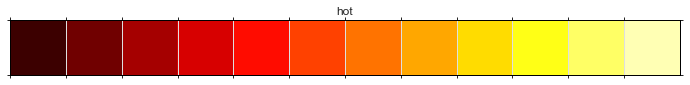

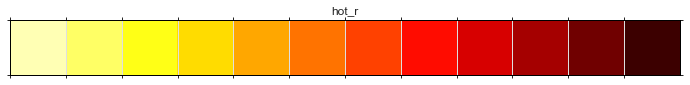

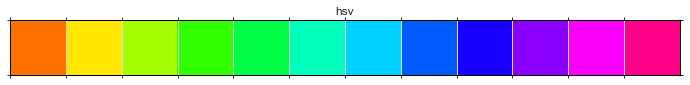

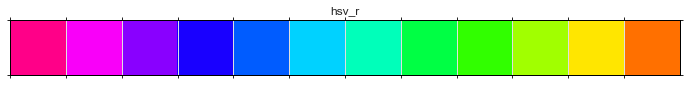

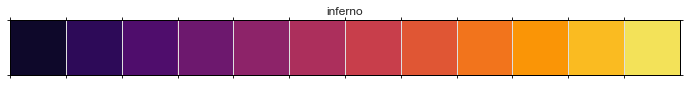

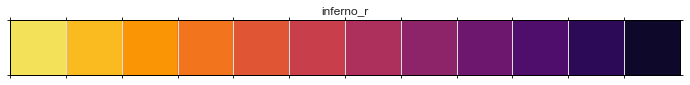

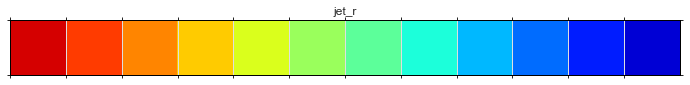

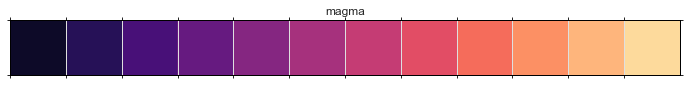

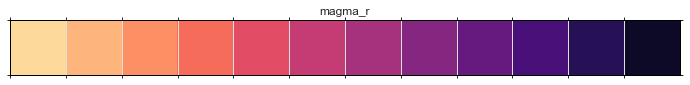

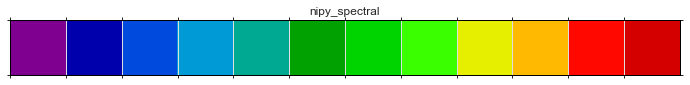

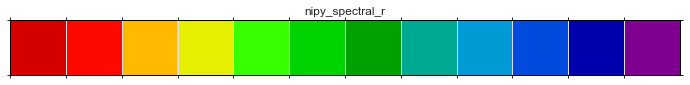

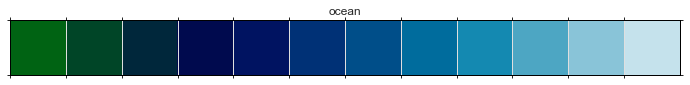

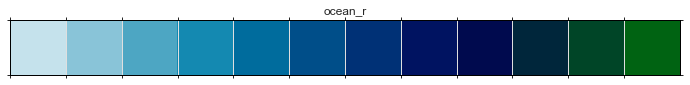

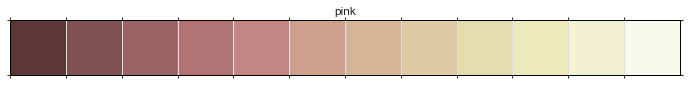

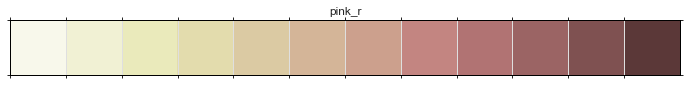

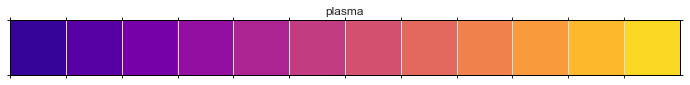

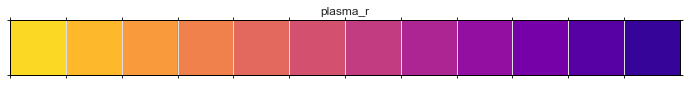

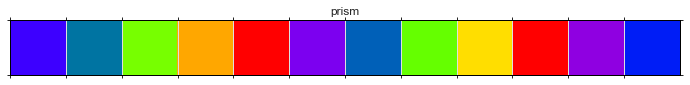

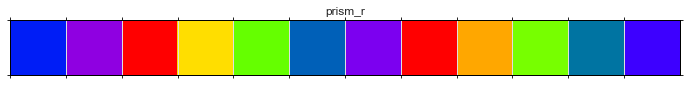

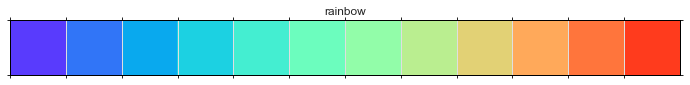

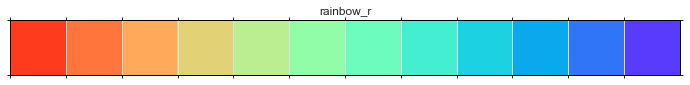

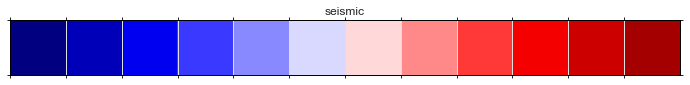

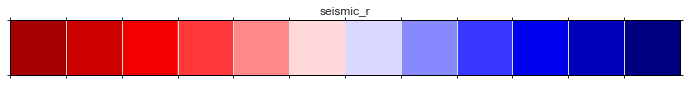

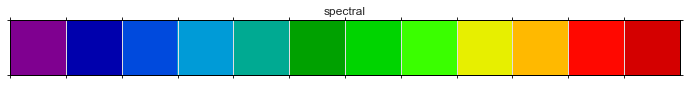

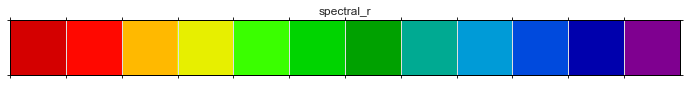

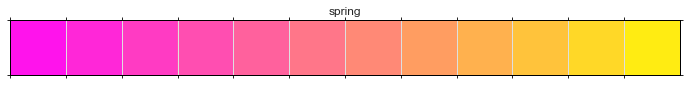

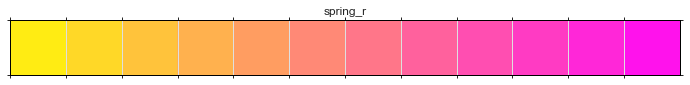

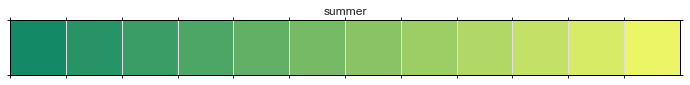

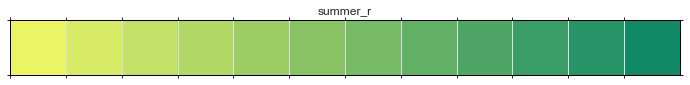

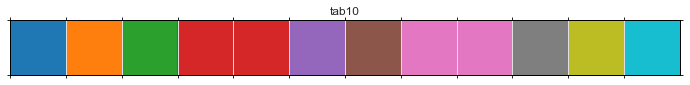

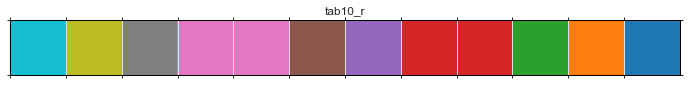

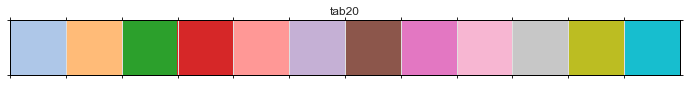

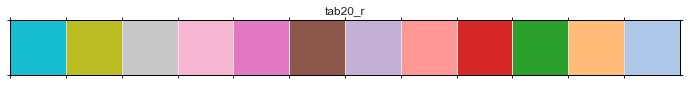

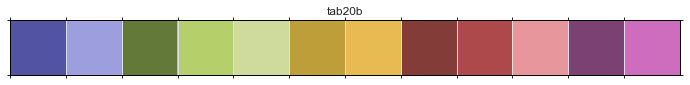

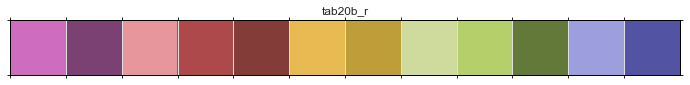

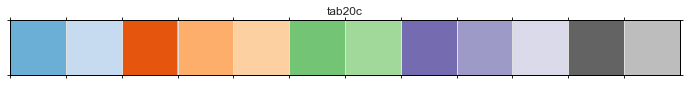

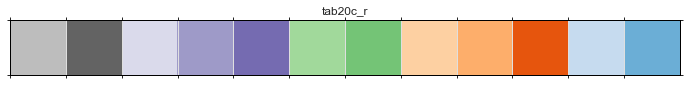

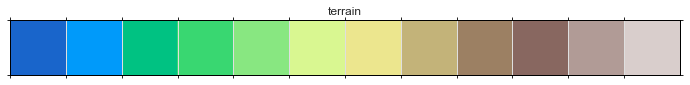

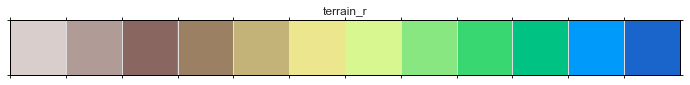

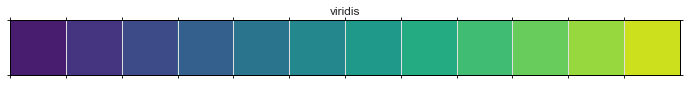

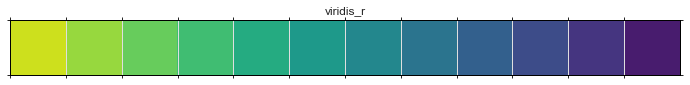

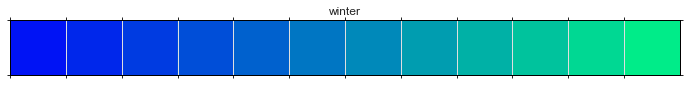

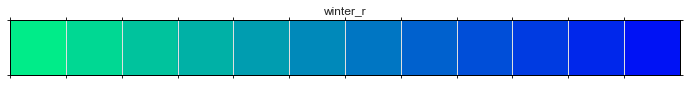

In [55]:
for cm in plt.colormaps():
    if cm!='jet':
        sns.palplot(sns.color_palette(cm,len(sim.colnames)))
        plt.title(cm)

## Mother and Bud

import "volume_reference_radius.txt"
//import "volume_hencky.txt"

model volume_mother_and_bud

  mother: volume_rheology();  
  bud: volume_rheology();

  budding_start = 3600;

  withSF = 0
  mother.withSF := withSF;
  bud.withSF :=withSF;
  k_nutrient = 2e-16//2.5e-16; // mM/s/um^2   
  k_deg_0 = 2.5e-16//2.8e-16;
  k_scaling_factor = 1.27

  bud.k_nutrient := k_nutrient;
  bud.k_deg_0 := k_deg_0;
  bud.k_scaling_factor := k_scaling_factor;

  mother.k_nutrient := k_nutrient;
  mother.k_deg_0 := k_deg_0;
  mother.k_scaling_factor := k_scaling_factor;

  
// diffrent cell wall elasticity of mother and bud
  
  
  mother.E := 2.58e6/0.75
  
  testE = 0 // 1 or 0 
  budE = 3.3e6
  bud.E := (budE*testE +(1-testE)*3.30e6)/0.75   // Mother E*1.28 as calculated from the measurements 


  extens_factor = 1.e+2
  mother.phi = 1.e-4  // neu
  bud.phi := mother.phi*extens_factor

//bud.phi = 1.e-2

  mother.k_nutrient := k_nutrient;
  mother.k_deg_0 := k_deg_0;

  //mother.r_os = 0.1
  //bud.r_os = 0.01

  bud_start_in_the_bud = 0;
  bud.bud_start := bud_start_in_the_bud;
  at time > budding_start: bud_start_in_the_bud = 1;
  at time > budding_start: bud.c_i = mother.c_i;

  // solute dffusion between mother and bud
  c_i_diffusion_coeff = 1.0//1e-3//1e-7; // idea: apparent diffusion coefficient (in addition it describes the permeability through the budneck)
  mother.c_i -> bud.c_i; c_i_diffusion_coeff * (mother.c_i - bud.c_i) * bud_start_in_the_bud ;   

  // water exchange between mother and bud
  mother_bud_water_perm = 1.0//1e-2 // 1e-5;
  mother.dV_exchange :=  -mother_bud_water_perm * (mother.pi_t - bud.pi_t) * bud_start_in_the_bud;
  bud.dV_exchange :=   mother_bud_water_perm * (mother.pi_t - bud.pi_t) * bud_start_in_the_bud;

  ////// Seperation and Partitioning of macromolecules ########################
  // Uncomment the following 4 lines to enable Separation and Partitioning:
  // t_seperation = 2400
  // k_diff_c := 1 - (1.0/(1.0 + exp(-0.05*(time - t_seperation))));
  // mother_bud_water_perm := 1 - (1.0/(1.0 + exp(-0.05*(time - t_seperation))));
  // d_Vb := 0.003*(1 - (1.0/(1.0 + exp(-0.05*(time - t_seperation)))));
  /////////////////////////////////////////////////////////////////////////////

end


In [68]:
sim.

       time, [mother_c_e], [mother_c_i], [bud_c_e], [bud_c_i], mother_r_b, mother_r_os, mother_R_ref, mother_pi_t,  bud_r_b, bud_r_os, bud_R_ref,  bud_pi_t
 [[       1,          240,       319.17,       240,    319.17,        0.3,         0.1,      0.38028,      200000,      0.3,      0.1,  0.384498,    200000],
  [  20.999,          240,      319.537,       240,    319.17,   0.301848,    0.108404,     0.389521,      200007,      0.3,      0.1,  0.384498,    200000],
  [  40.998,          240,      319.536,       240,    319.17,    0.30371,    0.116894,     0.398828,      200006,      0.3,      0.1,  0.384498,    200000],
  [  60.997,          240,      319.536,       240,    319.17,   0.305556,    0.125346,     0.408062,      200006,      0.3,      0.1,  0.384498,    200000],
  [  80.996,          240,      319.535,       240,    319.17,   0.307389,    0.133758,     0.417223,      200006,      0.3,      0.1,  0.384498,    200000],
  [ 100.995,          240,      319.535,       240,   

In [120]:
model_species={'time':r't' ,
               'mother_V_tot_fl':r'$V^M$',
               'mother_V_ref': r'$V^M_{ref}$',
               'bud_V_tot_fl':r'$V^B$',
               'bud_V_ref': r'$V^B_{ref}$',
               
               '[mother_c_e]': r'$c^M_e$',
               '[bud_c_e]': r'$c^B_e$',
               '[mother_c_i]': r'$c^M_i$',
               '[bud_c_i]': r'$c^B_i$',
               
               'mother_R_ref': r'$R^M_{ref}$',
               'mother_r_os' : r'$r^M_{os}$',
               'bud_R_ref': r'$R^B_{ref}$',
               'bud_r_os' : r'$r^B_{os}$',
               'mother_r'    : r'$r^M$',  
               'mother_r_b'  : r'$r^M_{b}$',
               'bud_r'    : r'$r^B$',           
               'bud_r_b'  : r'$r^B_{b}$',
               
               'mother_pi_i' : r'$\Pi^M_i$',
               'mother_pi_t' : r'$\Pi^M_t$',
               'bud_pi_i' : r'$\Pi^B_i$',
               'bud_pi_t' : r'$\Pi^B_t$',
               'mother_pi_e' : r'$\Pi_e$',


              }
end_time = 13000
steps = 1000

<_io.BufferedReader name='volume_reference_radius.txt'>


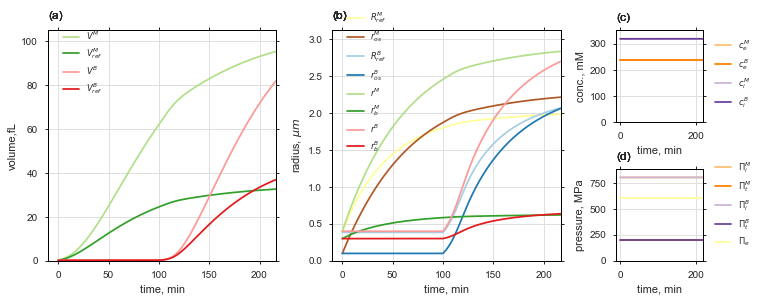

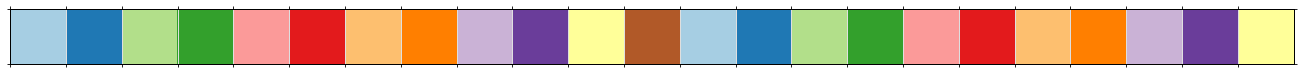

In [123]:
model=te.loada('volume_mother_and_bud.txt')

#model specifications
model['mother_t_permeability']=end_time+1
model['bud_t_permeability']=end_time+1
model['budding_start'] = 6000;
model['k_nutrient']=2.5e-16


#simulation
sim=model.simulate(1,end_time, steps=steps, selections=list(model_species.keys()))

variables = sim.colnames
number_of_variables = len(variables)
paras_dic = {}
paras_dic = get_paras_dic(modeltxt)
time, xlim  = time_in_s_or_min(sim['time'], scale='min')

# Plot

#Plot Grid
import matplotlib.gridspec as gridspec
gs=gridspec.GridSpec(2, 5)
ax=[]
ax.append(plt.subplot(gs[:,0:2]))
ax.append(plt.subplot(gs[:,2:4]))
ax.append(plt.subplot(gs[0,4]))
ax.append(plt.subplot(gs[1,4]))

fig1=plt.figure(1)
fig1.set_size_inches(10,4)

maxy = [0]*4
maxy_s = maxy

#caption position
pos_s=(0.0,1.1) #small subplot
pos_l=(0.0,1.05)#large subplot

#legend position
pos_o=(1.1, 0.1) # outside
pos_i=(0.05, 0.45) # inside

#cmap=sns.cubehelix_palette(number_of_variables, start=3, rot=1, dark=0.3, light=.95, reverse=True)
#cmap=sns.color_palette(['#a6cee3','#1f78b4','#b2df8a','#33a02c','#fb9a99','#e31a1c','#fdbf6f','#ff7f00','#cab2d6','#6a3d9a','#ffff99','#b15928'])
cmap=sns.color_palette('Paired', number_of_variables+1)

#cmap=sns.color_palette()
for k,var in enumerate(variables):
    
    #subplotlabel position
    pos=pos_s
    legend_loc=pos_o 
    scale_values=1
   
    if var == 'time':
        continue
        
    var1=var.split('_')[1]
    if var1.startswith('V'):
        plotnumb=0
        ylabel='volume,fL'
        pos=pos_l
        legend_loc=(0.05, 0.7)
               
    elif var1=='c':
        plotnumb=2
        ylabel='conc., mM'
            
#     elif var.startswith('r_'):
#         plot_details(sim, time, var,   max_y=3, ax=ax[1][0], scale='min', xlim=xlim, ylabel=r'radius, ${\mu} m$')
#         add_plot_label(2, ax=ax[1][0],pos=pos)
    elif var1 in ['r', 'R']:
        plotnumb=1
        ylabel=r'radius, ${\mu} m$'
        pos=pos_l
        legend_loc=pos_i

    elif var1.startswith('p'):
        plotnumb=3
        scale_values=0.001
        ylabel=r'pressure, MPa'
        pos=pos_s
        legend_loc=pos_o
    else:
        pass
    
    maxy_s=max(sim[var])*1.1
    #print(' maxy_S :{0} , maxy:{1} , variabl:{2}'.format(maxy_s,maxy[plotnumb],var)) # control for max values
    
    if (maxy[plotnumb] < maxy_s):
            maxy[plotnumb] = maxy_s

    plot_details(sim, time, var, ax[plotnumb],
                 title=' ',
                 max_y=maxy[plotnumb],
                 scale='min',
                 xlim=xlim,
                 ylabel=ylabel,
                 label=model_species[var],
                 scale_values=scale_values,
                 color=cmap[k+1])
    
    add_plot_label(plotnumb, ax[plotnumb],pos=pos, caps=False,)
    ax[plotnumb].legend(loc=legend_loc, fontsize='small', frameon=False)


#ax[-1][-1].axis('off')

#for pos,key in enumerate(paras_dic):
 #   ax[-1][-1].text(0.1, 1./len(paras_dic)*(pos+1)-1.5, key  + ' : ' + paras_dic[key], fontsize=9, transform=ax[-1][-1].transAxes)
plt.tight_layout()

#plt.savefig('plots/diss_simulation__refradius_osmo.png',dpi=600, bbox_inches="tight")
plt.savefig('/Users/bjorngoldenbogen/Google Drive/Diss/Dissertation_latex/figures/diss_simulation__refradius_osmo.png',dpi=600, bbox_inches="tight")

plt.figure(2)
sns.palplot(cmap)









In [83]:
var1

'V'